# Tratar dados 'Popular_Spotify_Songs.csv'

O Conjunto de dados contém faixas musicais e seu desempenho em várias plataformas. Inclui informações essenciais como nome da faixa, artista (s), data de lançamento e presença em playlists e paradas populares em plataformas como Spotify, Apple Music, Deezer e Shazam.

Colunas:
* track_name: O nome da faixa.
* artist(s)_name: O(s) nome(s) do(s) artista(s) que criou(m) a faixa.
* artist_count: O número de artistas associados à faixa.
* release_year: O ano em que a faixa foi lançada.
* release_month: O mês em que a faixa foi lançada.
* release_day: O dia em que a faixa foi lançada.
* in_spotify_playlists: Indica se a faixa está incluída nas playlists do Spotify.
* in_spotify_charts: Indica se a faixa está presente nos charts do Spotify.
* streams: O número total de streams que a faixa acumulou.
* in_apple_playlists: Indica se a faixa está incluída nas playlists do Apple Music.
* in_apple_charts: Indica se a faixa está presente nas paradas musicais da Apple.
* in_deezer_playlists: Indica se a faixa está incluída nas playlists do Deezer.
* in_deezer_charts: Indica se a faixa está presente nos charts do Deezer.
* in_shazam_charts: Indica se a trilha está presente nos gráficos do Shazam.
* bpm: Batidas por minuto – uma medida de andamento na música.
* key: A tonalidade musical na qual a faixa é composta.
* mode: Indica se a faixa está em tom maior ou menor.
* danceability_: Uma medida de quão adequada uma faixa é para dançar.
* valence_: A positividade musical transmitida por uma faixa.
* energy_: A energia percebida de uma trilha.
* acousticness_: Uma medida de quão acústica é uma faixa.
* instrumentalness_: Uma medida para saber se uma faixa contém vocais.
* liveness_speechiness_: Uma medida da presença de elementos vivos ou palavras faladas em uma faixa.

> Disponível em: https://www.kaggle.com/datasets/zeesolver/spotfy

# Analise explotária dos dados

In [1]:
#Importando Bibliotecas
import pandas as pd
import numpy as np

In [2]:
#Importando dados
#Utilizando parametro "enconding='latin-1'" para resolver problema de Unidecode
#Utilizando parametro decimal=',' para que as colunas que contenham valores decimais não sejam utilizados vírgula e sim pontos.
dados = pd.read_csv('https://raw.githubusercontent.com/elvissoares625/elvissoares625/main/An%C3%A1lise%20Explorat%C3%B3ria/dados/Popular_Spotify_Songs.csv', encoding='latin-1', decimal=',')

In [3]:
#Verificando primeiras linhas
dados.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
#Tamanho do Conjunto de Dados
#953 linhas e 24 colunas
dados.shape

(953, 24)

In [5]:
#Listando os tipos de dados
dados.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                  object
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists     float64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

A coluna ['streams'] está com o tipo 'object'.

Isso nos diz que existem valores diferentes de numeros na coluna.

In [6]:
#vamos localizar todos as linhas da série 'streams' não seja numérico colocando o caracater ~ antes da função, para negar os resultados.
dados.loc[~dados['streams'].str.isnumeric(),'streams']

574    BPM110KeyAModeMajorDanceability53Valence75Ener...
Name: streams, dtype: object

Veja que na coluna de streams, na linha 574 existe um valor diferente de numero, provavel erro de digitação.

In [7]:
#Removendo a linha com erro de digitação, acessando o index
dados.drop(dados.loc[~dados['streams'].str.isnumeric()].index, inplace=True)

In [8]:
#Conferindo se a alteração foi aplicada
dados.loc[~dados['streams'].str.isnumeric()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


In [9]:
#procurando valores nulos
dados.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

coluna 'in_shazam_charts' possui valores nulos, irei substituir por 0
quanto a coluna 'key', podemos manter os valores nulos, por ser uma variável categórica

In [10]:
dados['in_shazam_charts'].fillna(0, inplace=True)

In [11]:
#verificando se alteração foi aplicada com sucesso
dados.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [12]:
#realizando conversão do tipo de dado das colunas para inteiro
#as variaveis abaixo considero que não há como a música estar em em 0,3 playlist ou charts
#realizei a conversão para tratar somente como valores inteiros.
dados['streams'] = dados['streams'].astype(int)
dados['in_deezer_playlists'] = dados['in_deezer_playlists'].astype(int)
dados['in_shazam_charts'] = dados['in_shazam_charts'].astype(int)

In [13]:
dados.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [14]:
#Analisando as colunas numéricas
#Se existe algum valor sem sentido para o conjunto de dados
dados.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,100.939076,2.669118,48.173319,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,173.832057,6.038152,123.294397,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,9.000000,0.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,30.500000,0.000000,2.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,100.000000,2.000000,32.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,974.000000,58.000000,953.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


Visualmente esta tudo correto com as variaveis numéricas, itens analisados:
- released_year > valor minimo 1930 e máximo 2023 - OK
- released_month > valor minimo 1 e máximo 12 - OK
- released_day > valor minimo 1 e máximo 31 - OK

> Colunas de percentual (danceability_%	valence_%	energy_%	acousticness_%	instrumentalness_%	liveness_%	speechiness_%) todas com minimo e máximo dentro do esperado.

# Questões de Negócio

Com base no conjunto de dados, irei tentar explicar as seguintes questões de negócio:

> 1. Qual é a correlação entre o número de streams e a presença em playlists e charts?

> 2. Quais características musicais (bpm, danceability_, valence_, energy_, acousticness_, instrumentalness_, liveness_speechiness_) mais influenciam a presença de uma faixa em playlists e charts?

> 3. Há uma sazonalidade na quantidade de faixas lançadas durante o ano?

> 4. Qual é a distribuição de streams por ano de lançamento? Faixas mais antigas tendem a acumular mais streams?

> 5. Quais artistas têm o maior número de faixas em playlists e charts, e como isso se correlaciona com o número de streams?


## Qual é a correlação entre o número de streams e a presença em playlists e charts?

In [15]:
#importando bibliotecas para analise a visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
colunas_interesse = ['streams', 'in_spotify_playlists', 'in_spotify_charts',
                      'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
                      'in_deezer_charts', 'in_shazam_charts']

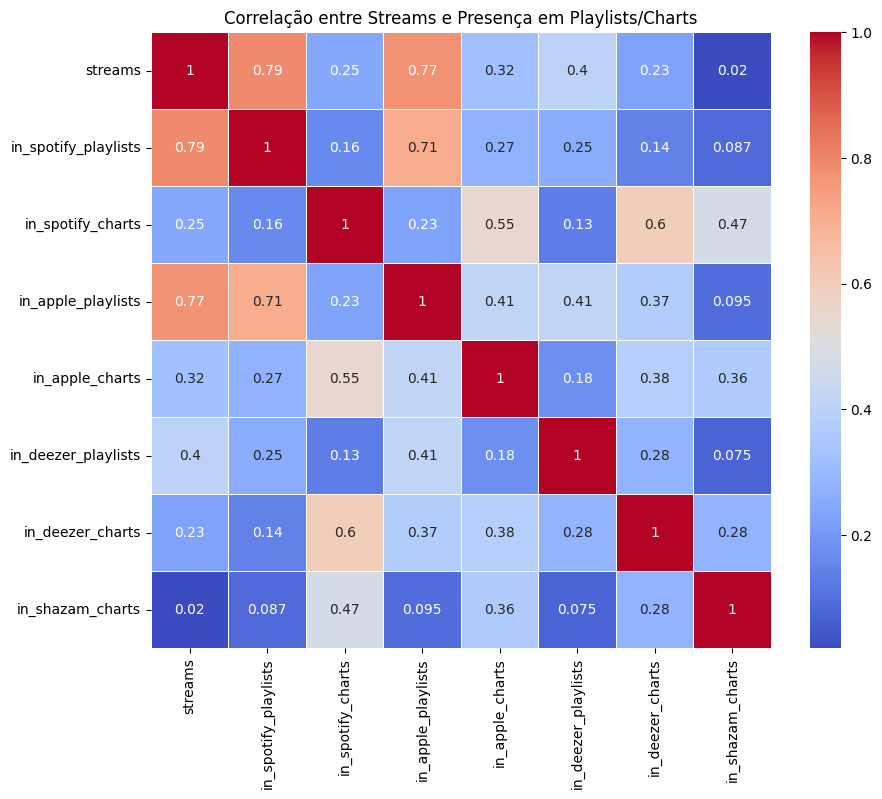

In [21]:
# Calcular a correlação
matriz_correlacao = dados[colunas_interesse].corr()

# Visualizar a correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', linewidth=.5)
plt.title('Correlação entre Streams e Presença em Playlists/Charts')
plt.show()

Os valores de correlação de Pearson variam de -1 a 1.
* 1 indica uma correlação perfeita positiva.
* 0 indica nenhuma correlação.
* -1 Indica uma correlação perfeita negativa.

> **Playlists vs. Charts**: A presença em playlists (Spotify, Apple Music, Deezer) tem uma correlação muito mais forte com o número de streams em comparação com a presença nos charts dessas plataformas. Isso indica que as playlists são um fator importante para aumentar os streams.

> **Plataformas**: A presença nas playlists do Spotify e do Apple Music mostra uma correlação forte e similar com os streams, indicando que essas plataformas têm um impacto significativo na popularidade das faixas.

> **Shazam**: A presença nos charts do Shazam tem pouca ou nenhuma correlação com os streams, sugerindo que essa plataforma não é um bom indicador de popularidade em termos de streams.

In [23]:
# Contagem de faixas em playlists
print(dados[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum())

in_spotify_playlists    4952842
in_apple_playlists        64609
in_deezer_playlists       96094
dtype: int64


A seguir vamos instanciar um modelo de regressão linear para quantificar o impacto que cada variável preditora ('in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists') tem na quantidade de Streams. O coeficiente de cada variável indica o impacto das playslists nos streams.

In [30]:
#Importanto bibliotecas do Sklean para treinar e instanciar o Modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Selecionar as variáveis preditoras e o alvo
X = dados[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']]
y = dados['streams']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

# Coeficientes do modelo
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])

# Ajustar a formatação dos coeficientes para uma notação mais legível
coefficients['Coeficiente'] = coefficients['Coeficiente'].apply(lambda x: f'{x:,.0f}')

print(coefficients)

R² Score: 0.7546759191636585
                     Coeficiente
in_spotify_playlists      39,457
in_apple_playlists     2,061,854
in_deezer_playlists      482,297


Avaliando o Modelo:
> Aproximadamente 75.46% da variação no número de streams pode ser explicada pela presença das faixas nas playlists do Spotify, Apple Music e Deezer.

> Esse é um valor bastante alto, sugerindo que o modelo se ajusta bem aos dados. A inclusão em playlists dessas três plataformas é uma variável muito importante para explicar a quantidade de streams que uma faixa recebe.

Analisando os Coeficientes:
> **Spotify Playlists**: Estar em uma playlist do Spotify está associado a um aumento de cerca de 39.456 streams. Isso sugere que as playlists do Spotify são eficazes para aumentar a visibilidade e os streams, mas não tanto quanto as playlists do Apple Music e do Deezer.

> **Apple Music Playlists**: Estar em uma playlist do Apple Music está associado a um aumento substancial de cerca de 2.061.854 streams, indicando que essas playlists são extremamente influentes em impulsionar o número de streams.

> **Deezer Playlists**: Estar em uma playlist do Deezer está associado a um aumento de cerca de 482.296 streams, mostrando que as playlists do Deezer também são muito eficazes, embora não tanto quanto as do Apple Music.

###**Conclusão**
Os coeficientes indicam que inclusão de faixas em playlists em qualquer plataforma tem um impacto positivo sobre os streams, e esse impacto varia significativamente entre as plataformas. O Apple Music, seguido pelo Deezer, parecem ter playlists mais influentets que o Spotify, embora seja significativo, tem um impacto menor.

Essa informação pode ser crucial para estratégias de marketing e promoção, sugerindo que esforços para colocar faixas em playlists do Apple Music e Deezer podem ser mais eficazes em impulsionar os streams.